#### Assignment: 9.3 Exercise: Neural Network Classifiers
#### Name: Prashant Raghuwanshi 
#### Date: 10/29/2021
#### Course: DSC550-T301 Data Mining (2221-1)

Neural Network Classifier with Scikit

###### Using the multi-label classifier dataset (categorized-comments.jsonl), fit a neural network classifier using scikit-learn to predict the comment category. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guide, but you will need to modify the code for this dataset. Report the accuracy, precision, recall, F1-score, and confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import jsonlines
import time
from textblob import TextBlob
import json

In [2]:
# 1.Load the data from the “categorized-comments.jsonl” file into a DataFrame.
addr1 = "C:/Users/dell/Documents/Machine_learning_assigments/week-9/categorized-comments.jsonl"

In [3]:
# Reading the JSON line file into a dataframe
newlist = []
with jsonlines.open(addr1) as f:
    for obj in f.iter(type=dict, skip_invalid=True):
        newlist.append(obj)
ccjsonsrc = pd.DataFrame(newlist)
ccjsonsrc.head(5)

,cat,txt
0,sports,Barely better than Gabbert? He was significant...
1,sports,Fuck the ducks and the Angels! But welcome to ...
2,sports,Should have drafted more WRs.\n\n- Matt Millen...
3,sports,[Done](https://i.imgur.com/2YZ90pm.jpg)
4,sports,No!! NOO!!!!!


In [4]:
# using lambda function and convert the string to lower case
ccjsonlower = ccjsonsrc.apply(lambda x: x.astype(str).str.lower())
# limitting the records in dataframe
sampledf = ccjsonlower.head(80000)
sampledf.head()

,cat,txt
0,sports,barely better than gabbert? he was significant...
1,sports,fuck the ducks and the angels! but welcome to ...
2,sports,should have drafted more wrs.\n\n- matt millen...
3,sports,[done](https://i.imgur.com/2yz90pm.jpg)
4,sports,no!! noo!!!!!


In [5]:
#Remove all punctuation from the text.
# Create the punctuation dictionary by using unicodedata
import sys
import unicodedata
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                  if unicodedata.category(chr(i)).startswith('P'))

In [6]:
# removing punctuation from each row of dataframe's txt column
for i in range(len(sampledf)) :
    test = [string.translate(punctuation) for string in (sampledf.loc[i, "txt"])]
    # coverting list to string
    test1 = "".join(str(x) for x in test)
    # updating the row values
    sampledf.loc[i, ["txt"]] = test1
# print dataframe after removing punctuations from txt column
sampledf.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,cat,txt
0,sports,barely better than gabbert he was significantl...
1,sports,fuck the ducks and the angels but welcome to a...
2,sports,should have drafted more wrs\n\n matt millen p...
3,sports,donehttpsiimgurcom2yz90pmjpg
4,sports,no noo


In [7]:
# Remove stop words.
# load library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# load stop words
stop_words = stopwords.words('english')

In [8]:
# remove stop words from each row of dataframe's txt column
for i in range(len(sampledf)) :
    # tokenized each row of dataframe's txt column
    test_token = word_tokenize(sampledf.loc[i, "txt"])
    # remove stop words
    rem_words = [word for word in test_token if word not in stop_words]
    # coverting list to string
    rem_words1 = " ".join(str(x) for x in rem_words)
    # writting back processed removed stop words to dataframe
    # updating the row values for txt column
    sampledf.loc[i, ["txt"]] = rem_words1
# printing last rows of dataframe showing removed stop words
print(rem_words)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


['love', 'latest', 'deck', 'video']


In [9]:
#print dataframe after updating the removed stop words to txt column
sampledf.head()

,cat,txt
0,sports,barely better gabbert significantly better yea...
1,sports,fuck ducks angels welcome new niners fans
2,sports,drafted wrs matt millen probably
3,sports,donehttpsiimgurcom2yz90pmjpg
4,sports,noo


In [10]:
# load library
from nltk.stem.porter import PorterStemmer
# create stemmer
porter = PorterStemmer()
# apply stemmer to each row of dataframe's txt column
for i in range(len(sampledf)) :
    # tokenized each row of dataframe's txt column
    test_token1 = word_tokenize(sampledf.loc[i, "txt"])
    # apply stemmer
    porter_words = [porter.stem(word) for word in test_token1]
    # coverting list to string
    porter_words1 = " ".join(str(x) for x in porter_words)
    # writting back processed removed stop words to dataframe
    # updating the row values for txt column
    sampledf.loc[i, ["txt"]] = porter_words1
# printing last rows of dataframe showing removed stop words
print(porter_words)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


['love', 'latest', 'deck', 'video']


In [11]:
# print dataframe after updating the applied stemmer to each row of dataframe's txt column
sampledf.head()

,cat,txt
0,sports,bare better gabbert significantli better year ...
1,sports,fuck duck angel welcom new niner fan
2,sports,draft wr matt millen probabl
3,sports,donehttpsiimgurcom2yz90pmjpg
4,sports,noo


In [12]:
sampledf3 = sampledf

In [13]:
from io import StringIO
sampledf3['category_id'] = sampledf3['cat'].factorize()[0]
category_id_df = sampledf3[['cat', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'cat']].values)
sampledf3.head()

<ipython-input-13-8e3e7fec068a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledf3['category_id'] = sampledf3['cat'].factorize()[0]


,cat,txt,category_id
0,sports,bare better gabbert significantli better year ...,0
1,sports,fuck duck angel welcom new niner fan,0
2,sports,draft wr matt millen probabl,0
3,sports,donehttpsiimgurcom2yz90pmjpg,0
4,sports,noo,0


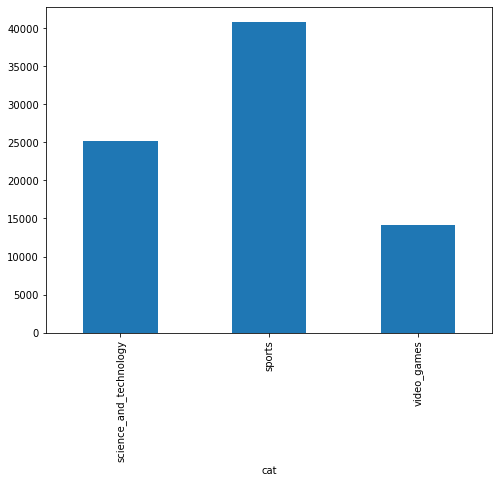

In [14]:
# verifying Imbalanced Classes
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
sampledf3.groupby('cat').txt.count().plot.bar(ylim=0)
plt.show()

In [15]:
print(sampledf3.columns)

Index(['cat', 'txt', 'category_id'], dtype='object')


In [16]:
sampledf4 = sampledf3.head(40000)
sampledf5 = sampledf4

In [17]:
# Convert each entry into a term frequency-inverse document frequency (tfidf) vector
#### Weighted Word Importance
#### here we are comparing the frequence of words in a document (a tweet, moview review speech transcripyt) 
#### with the frequency of words in all other documents using term frequency-inverse document frequency
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
ftidf = TfidfVectorizer()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(sampledf4.txt).toarray()
labels = sampledf4.category_id
features.shape

(40000, 15229)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(sampledf4['txt'], sampledf4['category_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts).toarray()
#clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [20]:
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape);print(X_train_tfidf.shape)

(30000,)
(10000,)
(30000,)
(10000,)
(30000, 24587)


In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,500,500), activation='relu', solver='adam', max_iter=5)
#mlp = MLPClassifier(hidden_layer_sizes=(500, 150))
#mlp.fit(X_train,y_train)
mlp.fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(500, 500, 500), max_iter=5)

In [22]:
predict_train = mlp.predict(X_train_tfidf)

In [23]:
## we can evaluate the performance of the model. Being a classification algorithm, 
# we will first import the required modules, which is done in the first line of code below. 
# The second and third lines of code print the confusion matrix and the confusion report results on the training data.
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
#print(classification_report(y_train,predict_train))
#print(confusion_matrix(y_train.argmax(axis=1),predict_train.argmax(axis=1)))

[[10433   739]
 [   51 18777]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11172
           1       0.96      1.00      0.98     18828

    accuracy                           0.97     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



In [24]:
## The above output shows the performance of the model on training data. The accuracy and the F1 score is around 0.98 and 0.99 

In [25]:
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts).toarray()

In [26]:
X_test_tfidf.shape

(10000, 13354)

In [27]:
X_test1_tfidf = np.resize(X_test_tfidf, (10000, 24587))

In [28]:
X_test1_tfidf.shape

(10000, 24587)

In [29]:
predict_test = mlp.predict(X_test1_tfidf)

In [30]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[1688 2029]
 [2858 3425]]
              precision    recall  f1-score   support

           0       0.37      0.45      0.41      3717
           1       0.63      0.55      0.58      6283

    accuracy                           0.51     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.53      0.51      0.52     10000



In [31]:
## The above output shows the performance of the model on test data. The accuracy and the F1 score is around 0.54 and 0.53 

### Neural Network Classifier with Keras

In [32]:
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [33]:
# Since our target variable represents a binary category which has been coded as numbers 0 and 1, we will have to encode it. 
# We can easily achieve that using the "to_categorical" function from the Keras utilities package. 
# The two lines of code below accomplishes that in both training and test datasets.
# one hot encode outputs
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

count_classes = y_test2.shape[1]
print(count_classes)

2


In [34]:
print(X_train_tfidf.shape, y_train2.shape)

(30000, 24587) (30000, 2)


In [47]:
# downsizeing the records due to memorry issue\n",
X_train5 = X_train.head(100)

In [41]:
# converting words to numbers
count = CountVectorizer()
bag_of_words = count.fit_transform(X_train5.to_numpy())
X_train4 = bag_of_words.toarray()

In [43]:
print(X_train4.shape, y_train2.shape)

(100, 747) (30000, 2)


In [59]:
y_train4 = np.resize(y_train2, (100, 2))

In [60]:
y_train4.shape

(100, 2)

In [53]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=747))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
import tensorflow as tf
# build the model
tf.config.run_functions_eagerly(True)
#model.fit(X_train, y_train, epochs=20)
model.fit(X_train4, y_train4, epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 43ms/step - loss: 0.6917 - accuracy: 0.5200
Epoch 2/20
4/4 [==============================] - 0s 31ms/step - loss: 0.5592 - accuracy: 0.7200
Epoch 3/20
4/4 [==============================] - 0s 39ms/step - loss: 0.4653 - accuracy: 0.7900
Epoch 4/20
4/4 [==============================] - 0s 42ms/step - loss: 0.3845 - accuracy: 0.9200
Epoch 5/20
4/4 [==============================] - 0s 37ms/step - loss: 0.3066 - accuracy: 0.9700
Epoch 6/20
4/4 [==============================] - 0s 31ms/step - loss: 0.2354 - accuracy: 0.9800
Epoch 7/20
4/4 [==============================] - 0s 28ms/step - loss: 0.1711 - accuracy: 0.9900
Epoch 8/20
4/4 [==============================] - 0s 29ms/step - loss: 0.1218 - accuracy: 0.9900
Epoch 9/20
4/4 [==============================] - 0s 31ms/step - loss: 0.0862 - accuracy: 0.9900
Epoch 10/20
4/4 [==============================] - 0s 31ms/step - loss: 0.0614 - accuracy: 0.9900
Epoch 11/20
4/4 [============

In [62]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_train4)
y_pred = np.argmax(y_pred1, axis=1)

In [63]:
y_train6 = np.resize(y_train2, (100))

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train6,y_pred))
print(classification_report(y_train6,y_pred))

[[16 34]
 [19 31]]
              precision    recall  f1-score   support

         0.0       0.46      0.32      0.38        50
         1.0       0.48      0.62      0.54        50

    accuracy                           0.47       100
   macro avg       0.47      0.47      0.46       100
weighted avg       0.47      0.47      0.46       100



In [ ]:
## The above output shows the performance of the model on train data. The accuracy and the F1 score is around 0.47 and 0.46

In [65]:
X_test.shape

(10000,)

In [66]:
#downsizing the test records, due to memory issue
X_test3 = X_test.head(100)

In [67]:
# converting words to numbers
bag_of_words1 = count.fit_transform(X_test3.to_numpy())
X_test4 = bag_of_words1.toarray()

In [68]:
X_test4.shape

(100, 811)

In [69]:
# resizing the array, due to difference in feature of trained model dataset and test model data set
X_test6 = np.resize(X_test4, (100, 747))

In [70]:
# evaluating the model with test data
y_test_pred1 = model.predict(X_test6)
y_test_pred = np.argmax(y_pred1, axis=1)

In [71]:
# resizing the array, due to difference in counts of test model dataset and test model data set
y_test3 = np.resize(y_test, (100))

In [72]:
print(confusion_matrix(y_test3,y_test_pred))
print(classification_report(y_test3,y_test_pred))

[[12 27]
 [23 38]]
              precision    recall  f1-score   support

           0       0.34      0.31      0.32        39
           1       0.58      0.62      0.60        61

    accuracy                           0.50       100
   macro avg       0.46      0.47      0.46       100
weighted avg       0.49      0.50      0.49       100



In [74]:
## The above output shows the performance of the model on test data. The accuracy and the F1 score is around 0.49 and 0.49 

#### Classifying Images

In [75]:
from keras.datasets import mnist
from keras.models import sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as k

In [76]:
# ste that the color channel value will be first
k.set_image_data_format("channels_last")

In [77]:
#set seed
np.random.seed(0)

In [78]:
# set image information
channels = 1
height = 28
width =28

In [79]:
# load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [80]:
# reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], height, width, channels)

In [81]:
# reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

In [83]:
# rescsle pixel intensity to between 0 and 1
features_train = data_train/255
features_test = data_test/255

In [84]:
# one hot encoding target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [85]:
# start neural network
network = Sequential()

In [86]:
# add convolutional layer with 64 filters 
network.add(Conv2D(filters = 64, kernel_size=(5, 5), input_shape=(height, width, channels), activation='relu'))

#network.add(Conv2D(filters = 64, kernel_size=(5, 5), input_shape= tf.reshape(2, (1, 2, 1)), activation='relu'))

In [87]:
# add max pooling layer
network.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last'))

In [88]:
# add dropout layer
network.add(Dropout(0.5))

In [89]:
network.add(Flatten())

In [90]:
network.add(Dense(128, activation="relu"))

In [91]:
#add dropout layer
network.add(Dropout(0.5))

In [92]:
# Add dropout layer
network.add(Dense(number_of_classes, activation="softmax"))

In [93]:
# compile neural network\
network.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics=["accuracy"])

In [94]:
print(features_train.shape); print(target_train.shape); print(features_test.shape), print(target_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


(None, None)

In [95]:
# train neural network
network.fit(features_train, target_train, epochs=2, verbose=0, batch_size=1000, validation_data=(features_test, target_test))